In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.stats.api as sms
import statsmodels.graphics.api as smg
import statsmodels.formula.api as smf

sns.set_style('whitegrid')
plt.rcParams['figure.dpi'] = 300
import matplotlib_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('retina')

Data source: https://www.openintro.org/data/csv/exam_grades.csv

In [4]:
grades = pd.read_csv('exam_grades.csv')

In [5]:
grades.head()

,semester,sex,exam1,exam2,exam3,course_grade
0,2000-1,Man,84.5,69.5,86.5,76.2564
1,2000-1,Man,80.0,74.0,67.0,75.3882
2,2000-1,Man,56.0,70.0,71.5,67.0564
3,2000-1,Man,64.0,61.0,67.5,63.4538
4,2000-1,Man,90.5,72.5,75.0,72.3949


In [6]:
grades['semester'].value_counts()

semester
2000-1    51
2001-1    38
2001-2    37
2002-1    36
2003-1    36
2000-2    35
Name: count, dtype: int64

In [7]:
grades['sex'].value_counts()

sex
Man      188
Woman     45
Name: count, dtype: int64

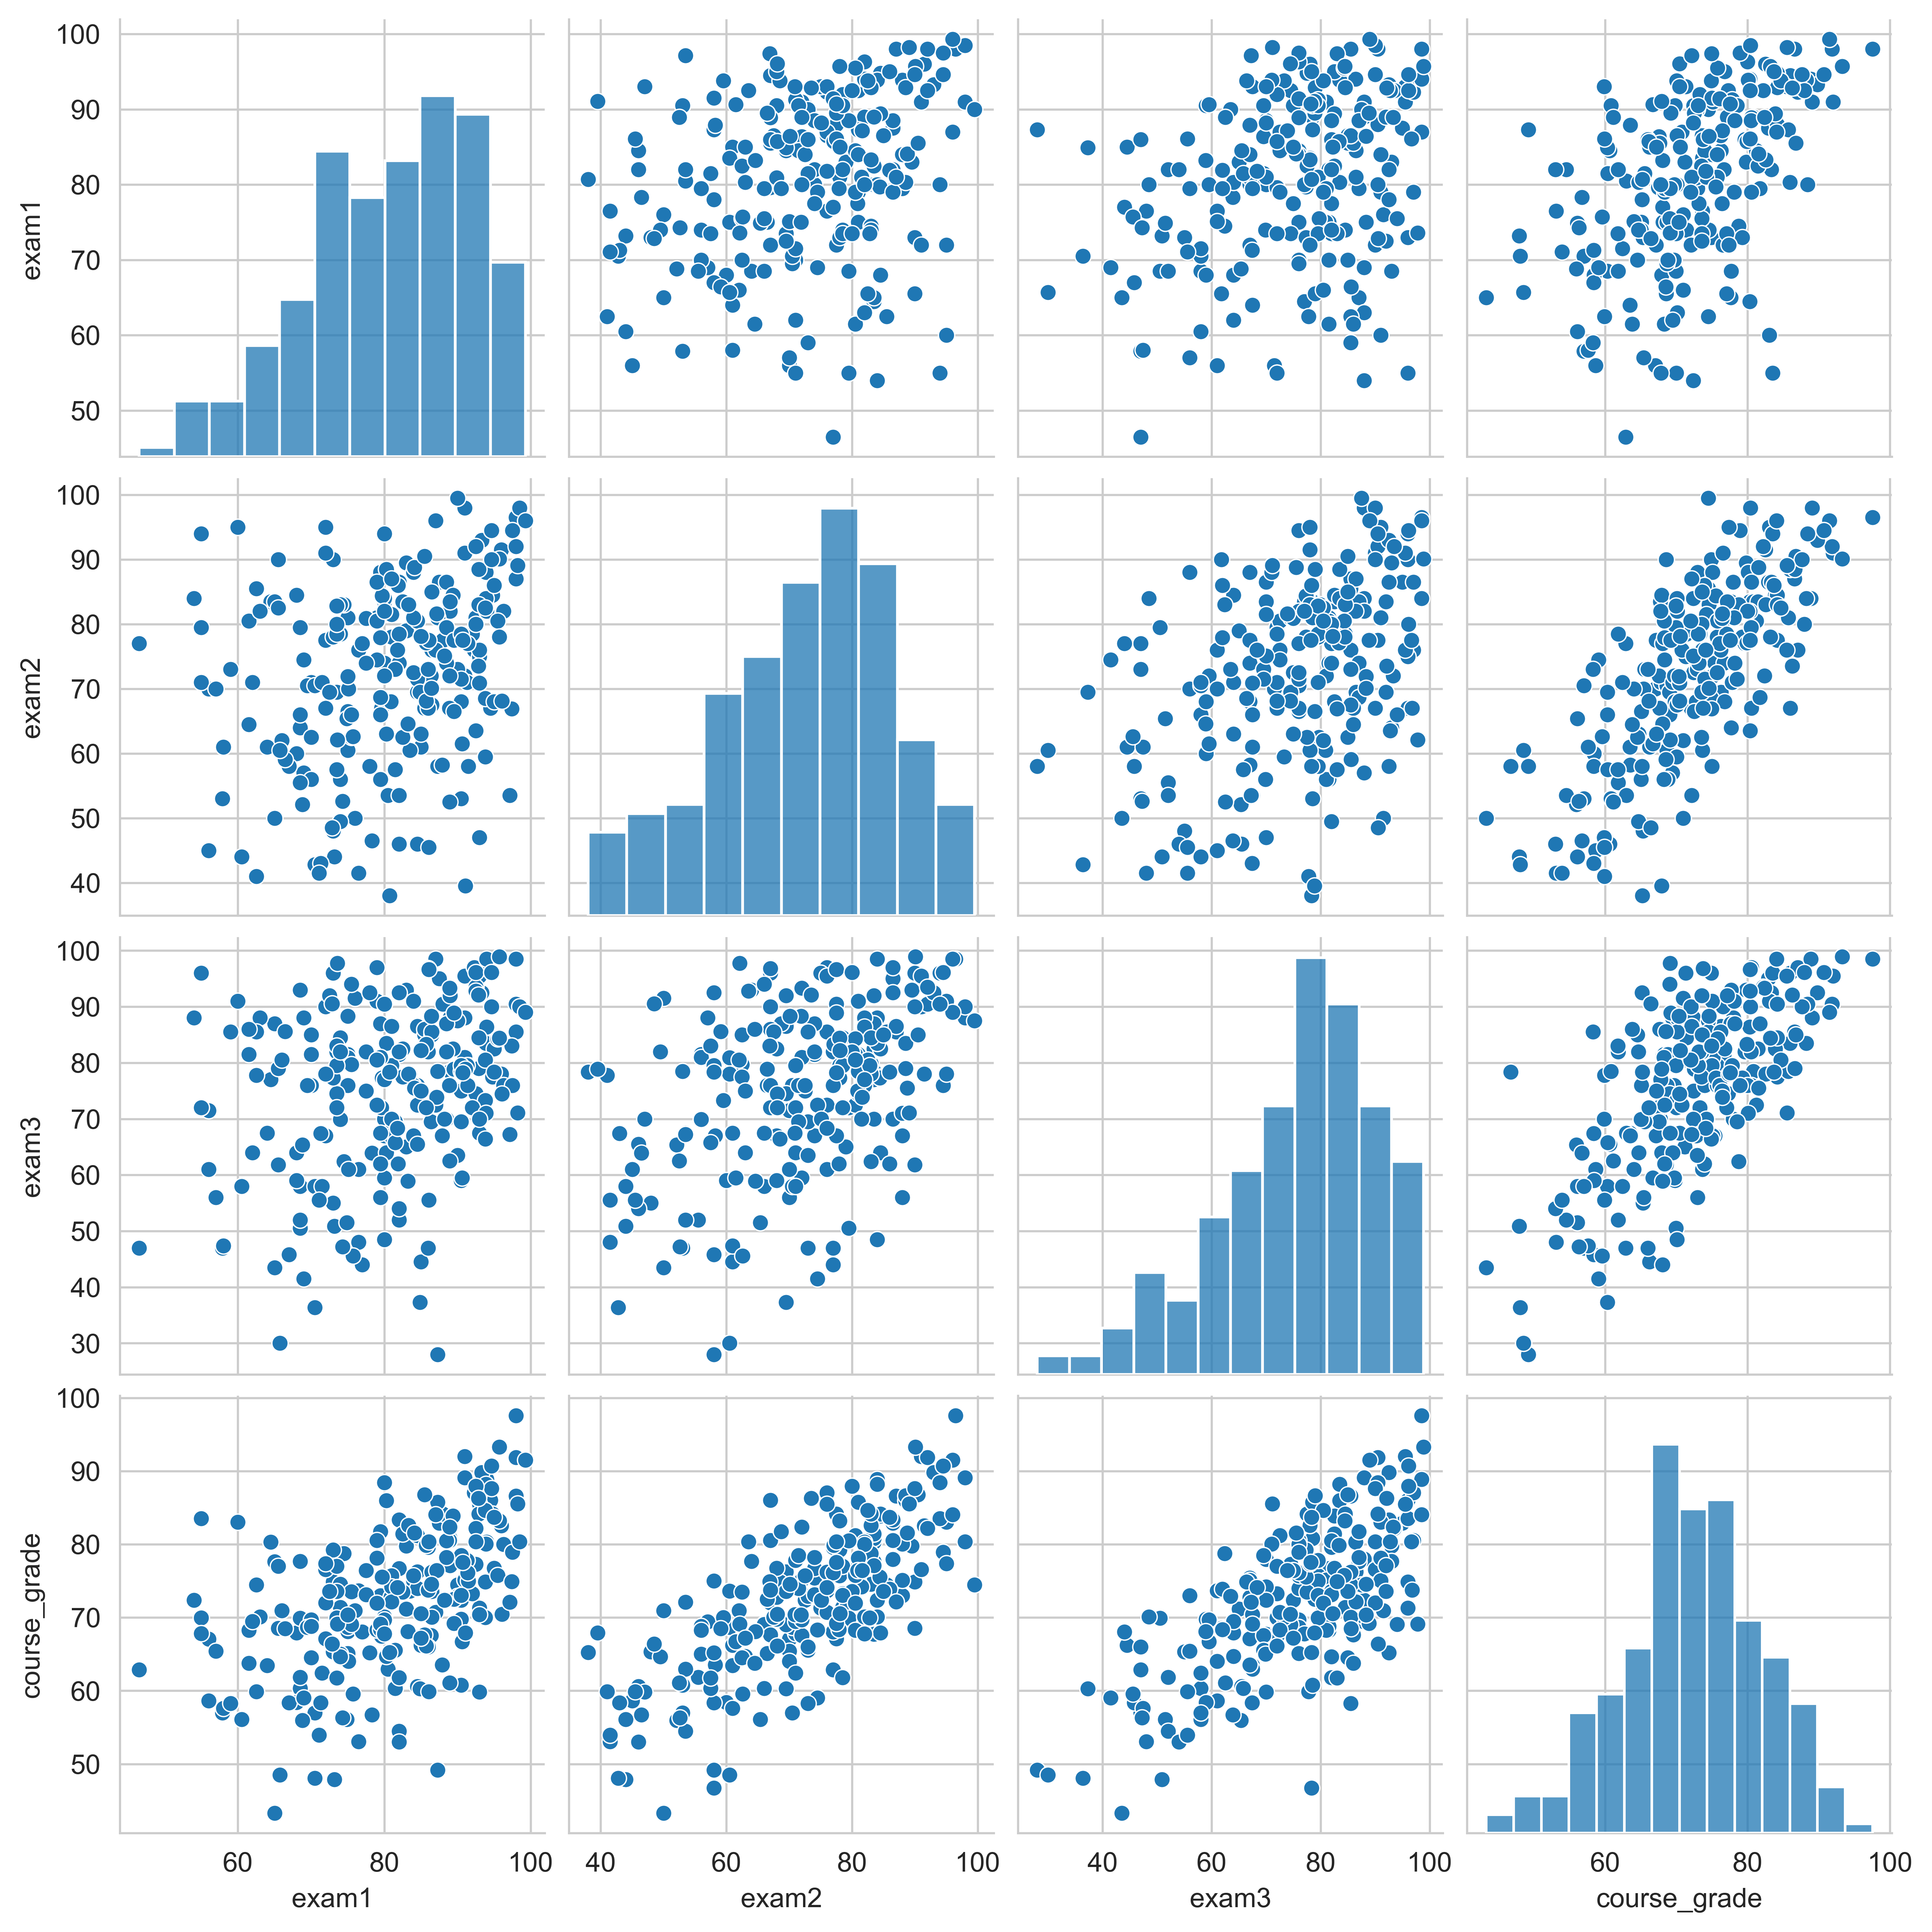

In [8]:
sns.pairplot(grades)

# Statsmodels with Patsy

In [9]:
model = smf.ols('course_grade ~ exam1 + exam2 + exam3', grades).fit()

In [10]:
model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
==================================================================
Model:              OLS              Adj. R-squared:     0.800    
Dependent Variable: course_grade     AIC:                1342.2535
Date:               2023-08-21 18:39 BIC:                1356.0404
No. Observations:   232              Log-Likelihood:     -667.13  
Df Model:           3                F-statistic:        309.3    
Df Residuals:       228              Prob (F-statistic): 4.66e-80 
R-squared:          0.803            Scale:              18.739   
--------------------------------------------------------------------
             Coef.    Std.Err.      t      P>|t|    [0.025    0.975]
--------------------------------------------------------------------
Intercept    7.4681     2.3797    3.1382   0.0019   2.7790   12.1572
exam1        0.2381     0.0273    8.7198   0.0000   0.1843    0.2919
exam2        0.3506     0.0233   15.0729   0.0000   0.3048    0.3965
exam3        0.2673     0.0219   12.1904   0.0000   0.2241    0.3105
------------------------------------------------------------------
Omnibus:              8.427         Durbin-Watson:           1.602
Prob(Omnibus):        0.015         Jarque-Bera (JB):        8.592
Skew:                 -0.471        Prob(JB):                0.014
Kurtosis:             3.038         Condition No.:           1117 
==================================================================
* The condition number is large (1e+03). This might indicate
strong multicollinearity or other numerical problems.
"""

### And if we wanted to try interactions...

In [11]:
model = smf.ols('course_grade ~ exam1 * exam2 * exam3', grades).fit()
model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                  Results: Ordinary least squares
===================================================================
Model:               OLS              Adj. R-squared:     0.803    
Dependent Variable:  course_grade     AIC:                1342.9258
Date:                2023-08-21 18:39 BIC:                1370.4997
No. Observations:    232              Log-Likelihood:     -663.46  
Df Model:            7                F-statistic:        135.4    
Df Residuals:        224              Prob (F-statistic): 7.90e-77 
R-squared:           0.809            Scale:              18.481   
-------------------------------------------------------------------
                   Coef.  Std.Err.    t    P>|t|   [0.025   0.975] 
-------------------------------------------------------------------
Intercept         46.5126  56.3777  0.8250 0.4102 -64.5859 157.6111
exam1             -0.4348   0.7380 -0.5892 0.5564  -1.8891   1.0195
exam2              0.1317   0.7973  0.1652 0.8689  -1.4394   1.7028
exam1:exam2        0.0053   0.0103  0.5092 0.6111  -0.0151   0.0256
exam3             -0.1874   0.7567 -0.2476 0.8046  -1.6785   1.3037
exam1:exam3        0.0082   0.0098  0.8337 0.4053  -0.0111   0.0275
exam2:exam3        0.0020   0.0103  0.1897 0.8497  -0.0184   0.0223
exam1:exam2:exam3 -0.0001   0.0001 -0.4409 0.6597  -0.0003   0.0002
-------------------------------------------------------------------
Omnibus:              9.453        Durbin-Watson:          1.610   
Prob(Omnibus):        0.009        Jarque-Bera (JB):       9.477   
Skew:                 -0.482       Prob(JB):               0.009   
Kurtosis:             3.223        Condition No.:          97530617
===================================================================
* The condition number is large (1e+08). This might indicate
strong multicollinearity or other numerical problems.
"""

# Statsmodels without Patsy

In [12]:
y = grades['course_grade']
X = grades[['exam1','exam2','exam3']].copy()
X['Intercept'] = 1  # This adds an intercept to the model.

In [13]:
# model = sm.OLS(y,X.values).fit()
# This fails due to a missing point. We didn't notice it before because
# the earlier method excluded that point automatically.

In [14]:
grades.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233 entries, 0 to 232
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   semester      233 non-null    object 
 1   sex           233 non-null    object 
 2   exam1         232 non-null    float64
 3   exam2         233 non-null    float64
 4   exam3         233 non-null    float64
 5   course_grade  233 non-null    float64
dtypes: float64(4), object(2)
memory usage: 11.0+ KB


In [15]:
X = grades[['exam1','exam2','exam3']].dropna()
X['Intercept'] = 1

In [16]:
y = grades[['exam1','exam2','exam3','course_grade']].dropna()['course_grade']

In [17]:
model = sm.OLS(y,X).fit()
model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
==================================================================
Model:              OLS              Adj. R-squared:     0.800    
Dependent Variable: course_grade     AIC:                1342.2535
Date:               2023-08-21 18:39 BIC:                1356.0404
No. Observations:   232              Log-Likelihood:     -667.13  
Df Model:           3                F-statistic:        309.3    
Df Residuals:       228              Prob (F-statistic): 4.66e-80 
R-squared:          0.803            Scale:              18.739   
--------------------------------------------------------------------
             Coef.    Std.Err.      t      P>|t|    [0.025    0.975]
--------------------------------------------------------------------
exam1        0.2381     0.0273    8.7198   0.0000   0.1843    0.2919
exam2        0.3506     0.0233   15.0729   0.0000   0.3048    0.3965
exam3        0.2673     0.0219   12.1904   0.0000   0.2241    0.3105
Intercept    7.4681     2.3797    3.1382   0.0019   2.7790   12.1572
------------------------------------------------------------------
Omnibus:              8.427         Durbin-Watson:           1.602
Prob(Omnibus):        0.015         Jarque-Bera (JB):        8.592
Skew:                 -0.471        Prob(JB):                0.014
Kurtosis:             3.038         Condition No.:           1117 
==================================================================
* The condition number is large (1e+03). This might indicate
strong multicollinearity or other numerical problems.
"""

### And if we wanted to add interactions...

In [18]:
X['exam1:exam2'] = X['exam1'] * X['exam2']
X['exam2:exam3'] = X['exam2'] * X['exam3']
X['exam1:exam3'] = X['exam1'] * X['exam3']
X['exam1:exam2:exam3'] = X['exam1'] * X['exam2'] * X['exam3']

In [19]:
model = sm.OLS(y,X).fit()
model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                  Results: Ordinary least squares
===================================================================
Model:               OLS              Adj. R-squared:     0.803    
Dependent Variable:  course_grade     AIC:                1342.9258
Date:                2023-08-21 18:39 BIC:                1370.4997
No. Observations:    232              Log-Likelihood:     -663.46  
Df Model:            7                F-statistic:        135.4    
Df Residuals:        224              Prob (F-statistic): 7.90e-77 
R-squared:           0.809            Scale:              18.481   
-------------------------------------------------------------------
                   Coef.  Std.Err.    t    P>|t|   [0.025   0.975] 
-------------------------------------------------------------------
exam1             -0.4348   0.7380 -0.5892 0.5564  -1.8891   1.0195
exam2              0.1317   0.7973  0.1652 0.8689  -1.4394   1.7028
exam3             -0.1874   0.7567 -0.2476 0.8046  -1.6785   1.3037
Intercept         46.5126  56.3777  0.8250 0.4102 -64.5859 157.6111
exam1:exam2        0.0053   0.0103  0.5092 0.6111  -0.0151   0.0256
exam2:exam3        0.0020   0.0103  0.1897 0.8497  -0.0184   0.0223
exam1:exam3        0.0082   0.0098  0.8337 0.4053  -0.0111   0.0275
exam1:exam2:exam3 -0.0001   0.0001 -0.4409 0.6597  -0.0003   0.0002
-------------------------------------------------------------------
Omnibus:              9.453        Durbin-Watson:          1.610   
Prob(Omnibus):        0.009        Jarque-Bera (JB):       9.477   
Skew:                 -0.482       Prob(JB):               0.009   
Kurtosis:             3.223        Condition No.:          97530617
===================================================================
* The condition number is large (1e+08). This might indicate
strong multicollinearity or other numerical problems.
"""

# Using sklearn

In [20]:
from sklearn.linear_model import LinearRegression

In [21]:
y = grades[['exam1','exam2','exam3','course_grade']].dropna()['course_grade']
X = grades[['exam1','exam2','exam3']].dropna()

In [22]:
modelsk = LinearRegression().fit(X,y)

In [23]:
modelsk.coef_

array([0.23806494, 0.35062868, 0.26731364])

In [24]:
modelsk.intercept_

7.4681078482404075

In [25]:
model = smf.ols('course_grade ~ exam1 + exam2 + exam3', grades).fit()
model.params

Intercept    7.468108
exam1        0.238065
exam2        0.350629
exam3        0.267314
dtype: float64

### The intended use of this - machine learning

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [28]:
modelsk = LinearRegression().fit(X_train, y_train)

In [29]:
modelsk.score(X_train,y_train)

0.7982667092529264

In [30]:
modelsms = smf.ols('course_grade ~ exam1 + exam2 + exam3', X_train.join(y_train)).fit()
modelsms.rsquared

0.7982667092529263

In [31]:
modelsk.score(X_test,y_test)

0.7785760999247727

In [32]:
from sklearn.metrics import r2_score

In [33]:
r2_score(y_test, modelsms.predict(X_test))

0.778576099924774